In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Common imports
import numpy as np
import os
# import cv2
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split


# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

brain =pd.read_csv('C:/Users/Basit/Downloads/brain_stroke_in_numeric_without_useless_data22.csv')
brain=brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('C:/Users/Basit/Downloads/brain_stroke_after_pca23.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain_pca)
print(brain)


      principal component 1  principal component 2  stroke
0                  2.314804               1.701292       1
1                  1.334051               0.494870       1
2                  1.763879              -0.538178       1
3                  2.150142               1.065223       1
4                  1.938705               1.232691       1
...                     ...                    ...     ...
4976              -0.736223               0.449289       0
4977               1.439055               1.221043       0
4978               2.011923              -0.146382       0
4979               0.749794               0.022445       0
4980               1.963507               0.006951       0

[4981 rows x 3 columns]
      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3      

Accuracy: 0.9478260869565217


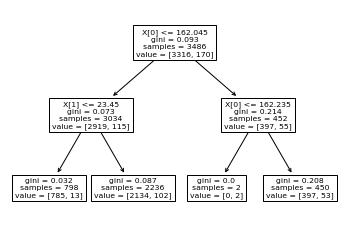

In [42]:
X = brain.iloc[:, [5,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)
plot_tree(tree_clf);




In [43]:
sgd_clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
sgd_clf.score(X_test, y_test)

0.05217391304347826

In [45]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.95180723, 0.95094664, 0.68674699])

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)



array([[3296,   20],
       [ 169,    1]], dtype=int64)

In [47]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[3316,    0],
       [   0,  170]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score, recall_score, classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3316
           1       0.05      0.01      0.01       170

    accuracy                           0.95      3486
   macro avg       0.50      0.50      0.49      3486
weighted avg       0.91      0.95      0.93      3486



In [49]:
precision_score(y_train, y_train_pred, average=None)

array([0.95122655, 0.04761905])

In [50]:
3296/(3296+169)

0.9512265512265512

In [51]:
recall_score(y_train, y_train_pred, average=None)

array([0.99396864, 0.00588235])

In [52]:
3296/(3296+20)

0.9939686369119421

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average=None)

In [75]:
3296 / (3296 + (169 + ) / 2)

0.972128004719068

In [53]:
y_scores = sgd_clf.decision_function(X_test)
y_scores

array([800.56025996, 324.67495276, 324.40207377, ..., 136.91184383,
       312.75578613, 589.39629518])

In [54]:
threshold = -500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [55]:
threshold = -1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

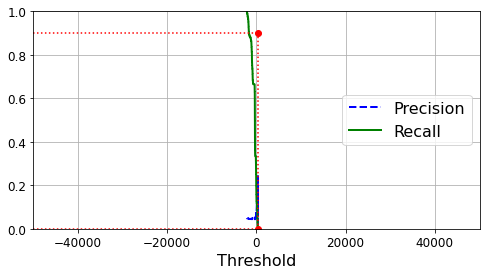

In [56]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.20)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [57]:
(y_train_pred == (y_scores > 0)).all()

False

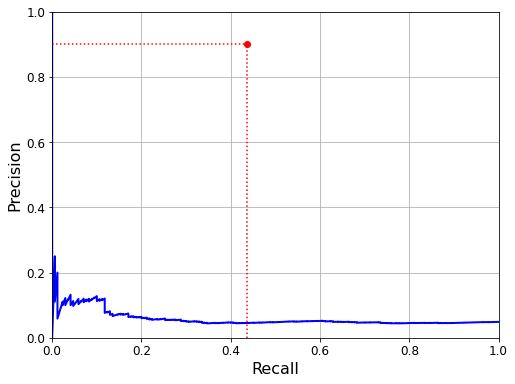

In [58]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

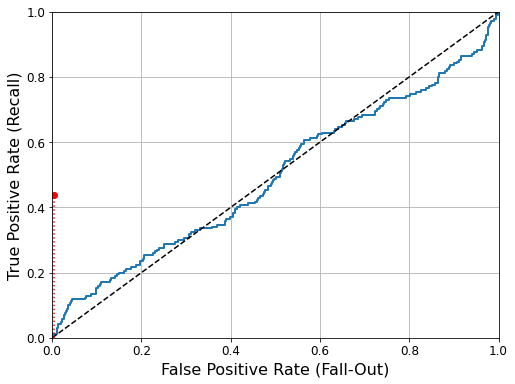

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()



Accuracy: 0.9478260869565217


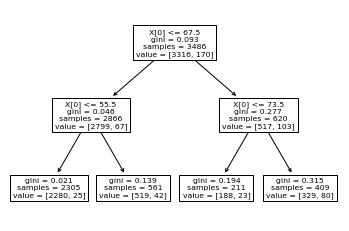

In [127]:
X = brain.iloc[:, [1,5]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_tree(tree_clf);

In [128]:
sgd_clf.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [129]:
sgd_clf.score(X_test, y_test)

0.10434782608695652

In [130]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.95180723, 0.32788296, 0.94578313])

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[3258,   58],
       [ 163,    7]], dtype=int64)

In [132]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[3316,    0],
       [   0,  170]], dtype=int64)

In [133]:
from sklearn.metrics import precision_score, recall_score, classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3316
           1       0.11      0.04      0.06       170

    accuracy                           0.94      3486
   macro avg       0.53      0.51      0.51      3486
weighted avg       0.91      0.94      0.92      3486



In [134]:
precision_score(y_train, y_train_pred, average=None)

array([0.95235311, 0.10769231])

In [135]:
3275/(3275+167)

0.9514816966879721

In [136]:
recall_score(y_train, y_train_pred, average=None)

array([0.98250905, 0.04117647])

In [137]:
3275/(3275+41)

0.9876357056694813

In [138]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average=None)

array([0.96719608, 0.05957447])

In [139]:
3275 / (3275 + (167 + 41) / 2)



0.9692216632139686

In [140]:
y_scores = sgd_clf.decision_function(X_test)
y_scores

array([514.61145963,  42.03367174,  -7.55636498, ..., 154.44127003,
       -17.81866401, 491.81899367])

In [141]:
threshold = -500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [142]:
threshold = -1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

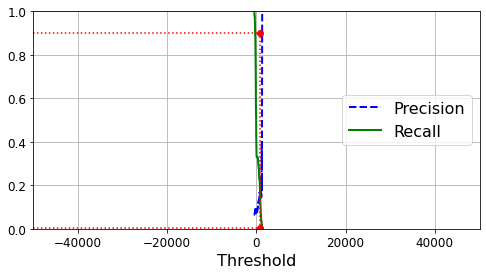

In [143]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.20)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [144]:
(y_train_pred == (y_scores > 0)).all()

False

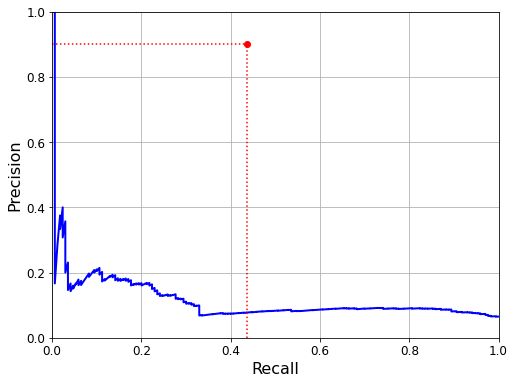

In [145]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

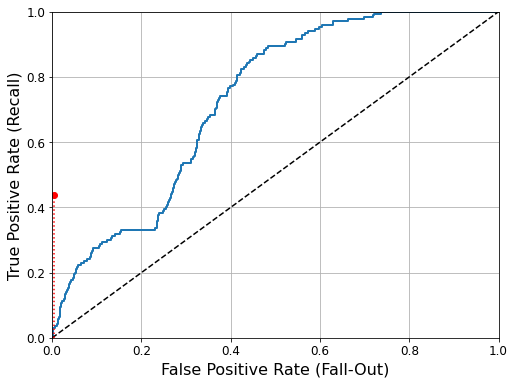

In [146]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()


In [148]:
X = brain.iloc[:, [1,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


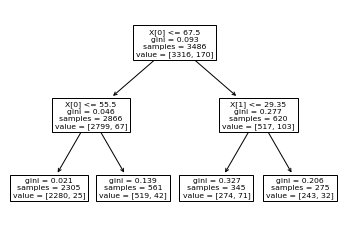

In [149]:
plot_tree(tree_clf);

In [150]:
sgd_clf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [151]:
sgd_clf.score(X_test, y_test)

0.33712374581939797

In [152]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.95180723, 0.95094664, 0.95094664])

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[3275,   41],
       [ 167,    3]], dtype=int64)

In [154]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[3316,    0],
       [   0,  170]], dtype=int64)

In [155]:
from sklearn.metrics import precision_score, recall_score, classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3316
           1       0.07      0.02      0.03       170

    accuracy                           0.94      3486
   macro avg       0.51      0.50      0.50      3486
weighted avg       0.91      0.94      0.92      3486



In [156]:
precision_score(y_train, y_train_pred, average=None)

array([0.9514817 , 0.06818182])

In [157]:
3275/(3275+167)

0.9514816966879721

In [158]:
recall_score(y_train, y_train_pred, average=None)

array([0.98763571, 0.01764706])

In [159]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average=None)

array([0.96922166, 0.02803738])

In [160]:
3275 / (3275 + (167 + 41) / 2)

0.9692216632139686

In [161]:
threshold = -500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True, False, ..., False, False,  True])

In [162]:
threshold = -1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

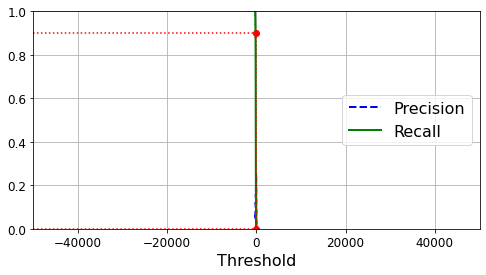

In [163]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.20)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [164]:
(y_train_pred == (y_scores > 0)).all()

False

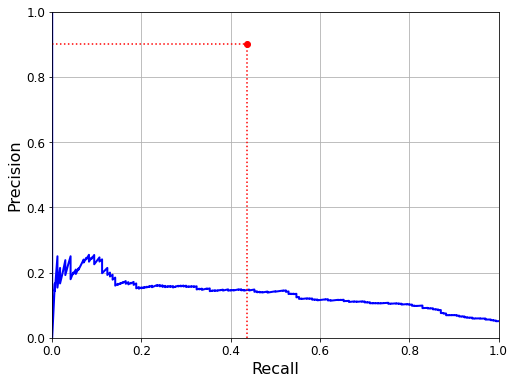

In [165]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

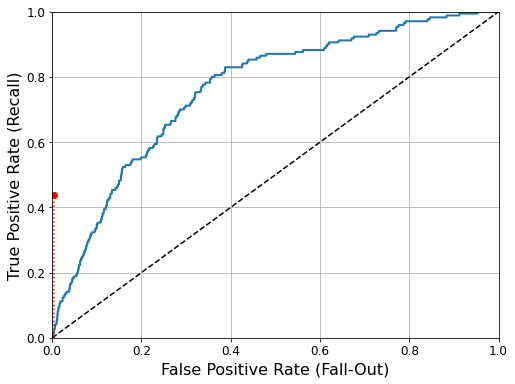

In [166]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()